In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
years = range(2000,2015)

pieces = []
columns = ['When Reported','Offense Code','location']

for year in years:
    path = 'C:/Users/flunk_000/Desktop/CalPoly/StakeOut/%d.csv' % year
    frame = pd.read_csv(path, names=columns, header = True)

    pieces.append(frame)

crimeData = pd.concat(pieces, ignore_index=True)

#Total Crime/Day

In [3]:
for i in range(len(crimeData['location'])):
    if crimeData['location'][i] == 'LZ1':
        crimeData['location'][i]=1
    if crimeData['location'][i] =='LZ2':
        crimeData['location'][i]=2
    if crimeData['location'][i]=='LZ3':
        crimeData['location'][i]=3

In [4]:
crimeData['When Reported'] = [datetime.datetime.strptime(date, '%H:%M:%S %m/%d/%Y') for date in crimeData['When Reported']]

In [5]:
crimeData['When Reported'] = sorted(crimeData['When Reported'])

In [6]:
ts = pd.Series(crimeData['location'],index=crimeData['When Reported'])
ts[0:] = 1

In [7]:
byDay = ts.resample('D',how='sum')

# Total Crime/Day, by Zone 

In [8]:
z1 = crimeData.query('location == 1')
z2 = crimeData.query('location == 2')
z3 = crimeData.query('location == 3')

In [9]:
print('Total crime for zone 1:',len(z1));print('Total crime for zone 2:',len(z2));print('Total crime for zone 3:',(len(z3)))

('Total crime for zone 1:', 167318)
('Total crime for zone 2:', 176247)
('Total crime for zone 3:', 75107)


In [10]:
z1 = z1.reset_index();
z2 = z2.reset_index();
z3 = z3.reset_index();

In [11]:
del z1['index']
del z2['index']
del z3['index']

In [12]:
z1TS = pd.Series(z1['location'],index=z1['When Reported'])
z1TS[0:] = 1

z2TS = pd.Series(z1['location'],index=z2['When Reported'])
z2TS[0:] = 1

z3TS = pd.Series(z1['location'],index=z3['When Reported'])
z3TS[0:] = 1

In [13]:
z1TS = z1TS.resample('D',how='sum')
z2TS = z2TS.resample('D',how='sum')
z3TS = z3TS.resample('D',how='sum')

In [14]:
z1mean = round(np.mean(z1TS),2)
z1std = round(np.std(z1TS),2)

z2mean = round(np.mean(z2TS),2)
z2std = round(np.std(z2TS),2)

z3mean = round(np.mean(z3TS),2)
z3std = round(np.std(z3TS),2)

## Crime by Zone: Visualization

In [15]:
from matplotlib.gridspec import GridSpec

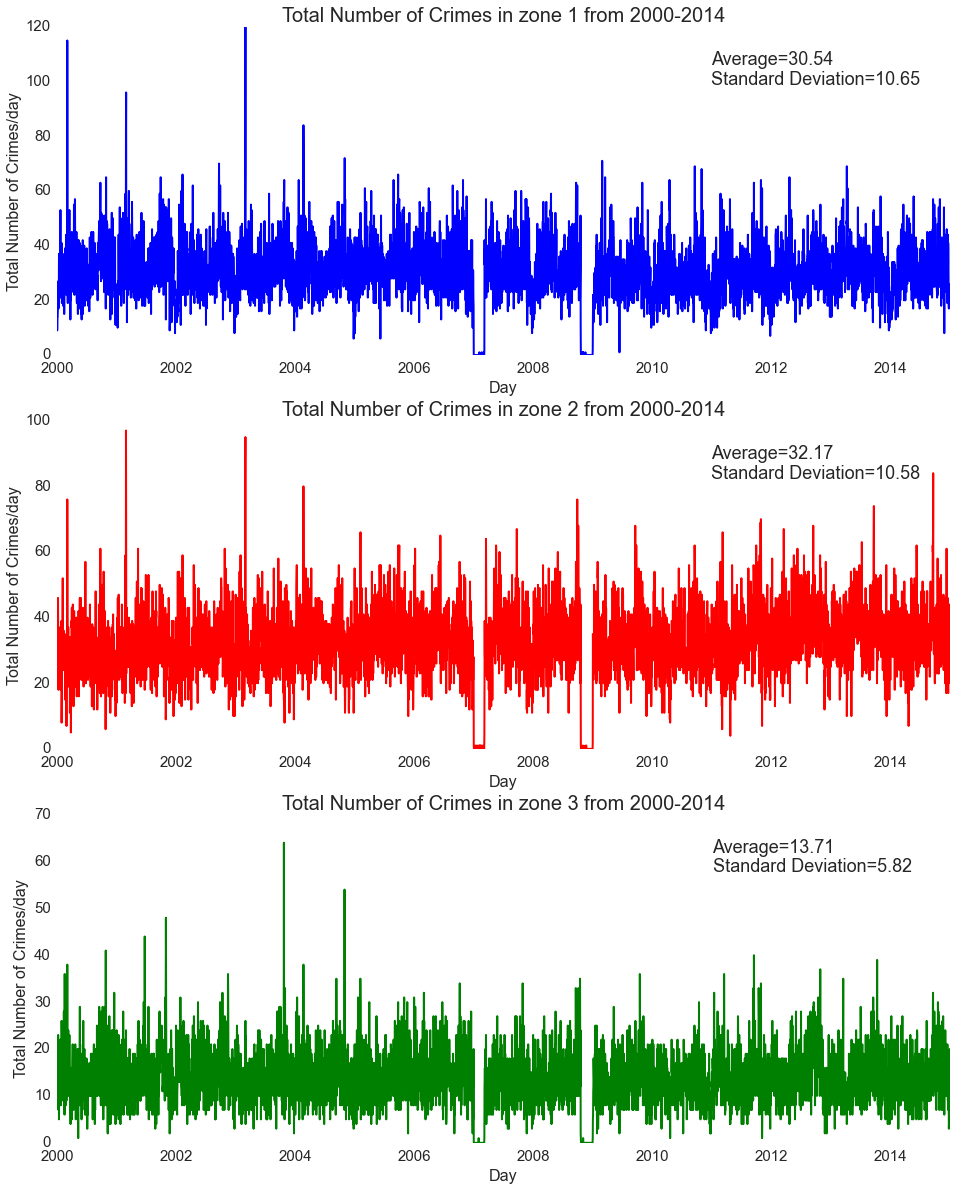

In [16]:
figure = plt.figure(figsize=(16,20))
gs = GridSpec(3,1)

z1plot = figure.add_subplot(gs[0,0])
z1plot =z1TS.plot(linewidth=2, c='blue')
z1plot.set_ylabel('Total Number of Crimes/day', fontsize=16)
z1plot.set_xlabel('Day',fontsize=16)
z1plot.set_title('Total Number of Crimes in zone 1 from 2000-2014',fontsize=20)
z1plot.tick_params(axis='both', labelsize=15)
z1plot.text(0.8, 0.9,'Average=%.2f' %z1mean, ha='center', va='center', transform=z1plot.transAxes, fontsize = 18)
z1plot.text(0.849, 0.84,'Standard Deviation=%.2f' %z1std, ha='center', va='center', transform=z1plot.transAxes, fontsize = 18);

z2plot = figure.add_subplot(gs[1,0])
z2plot = z2TS.plot(linewidth=2, c='red')
z2plot.set_ylabel('Total Number of Crimes/day', fontsize=16)
z2plot.set_xlabel('Day',fontsize=16)
z2plot.set_title('Total Number of Crimes in zone 2 from 2000-2014',fontsize=20)
z2plot.tick_params(axis='both', labelsize=15)
z2plot.text(0.8, 0.9,'Average=%.2f' %z2mean, ha='center', va='center', transform=z2plot.transAxes, fontsize = 18)
z2plot.text(0.849, 0.84,'Standard Deviation=%.2f' %z2std, ha='center', va='center', transform=z2plot.transAxes, fontsize = 18);

z3plot = figure.add_subplot(gs[2,0])
z3plot = z3TS.plot(linewidth=2, c='green')
z3plot.set_ylabel('Total Number of Crimes/day', fontsize=16)
z3plot.set_xlabel('Day',fontsize=16)
z3plot.set_title('Total Number of Crimes in zone 3 from 2000-2014',fontsize=20)
z3plot.tick_params(axis='both', labelsize=15)
z3plot.text(0.8, 0.9,'Average=%.2f' %z3mean, ha='center', va='center', transform=z3plot.transAxes, fontsize = 18)
z3plot.text(0.846, 0.84,'Standard Deviation=%.2f' %z3std, ha='center', va='center', transform=z3plot.transAxes, fontsize = 18);

##Crime by Zone: Harmonic Model 

In [109]:
def imabs(complexNum):
    return 2*abs(complexNum)/float(2048)

def imarg(complexNum):
    return math.atan2(complexNum.imag,complexNum.real)

def sine_wave(time,amp,freq,phi,damp):
    return ((math.exp(-1*damp*time))*
            (amp*math.cos(2*math.pi*freq*time+phi)))

In [110]:
ffts = {'1stWindow': np.fft.fft(z1TS[3431:5479])}

In [111]:
harmonicDF = pd.DataFrame(ffts)

In [112]:
harmonicDF['peakAmp1']= harmonicDF.apply(lambda row: imabs(row['1stWindow']), axis=1)

In [113]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [114]:
harmonicDF['peakAmp1'][0] = 0
harmonicDF['peakAmp1'][1023] = abs(harmonicDF['1stWindow'][1023])

In [115]:
harmonicDF['k'] = np.arange(len(harmonicDF))

In [116]:
harmonicDF['freq'] = harmonicDF['k']/float(2048)

In [117]:
harmonicDF['phase(rad)1']= harmonicDF.apply(lambda row: imarg(row['1stWindow']), axis=1)

In [118]:
peakDF = harmonicDF.filter(regex='peakAmp1')

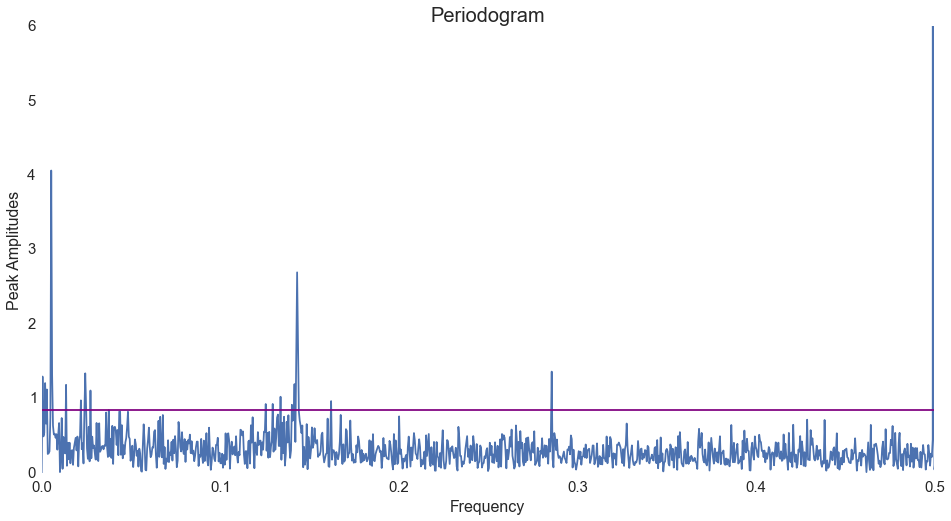

In [144]:
figure = plt.figure(figsize = (16,8))
plt.plot(harmonicDF['freq'], harmonicDF['peakAmp1'])
plt.ylim(0,6)
plt.xlim(0,.5)
plt.axhline(.84,0, color='purple')
plt.ylabel('Peak Amplitudes', fontsize = 16)
plt.xlabel('Frequency', fontsize = 16)
plt.tick_params(axis='both', labelsize=15)
plt.title('Periodogram', fontsize = 20);

In [120]:
index = pd.date_range('2000-01-01', periods=5479, freq='D')
waveDF = pd.DataFrame(mdates.date2num(index), columns=['time'])
waveDF['When Reported'] = index

In [121]:
peakDFsorted = peakDF.sort(['peakAmp1'],ascending=False);
amp1st = peakDFsorted['peakAmp1'][1:43]

In [122]:
amp1st

11      4.062634
2037    4.062634
1755    2.694162
293     2.694162
294     1.741199
1754    1.741199
292     1.495018
1756    1.495018
585     1.360003
1463    1.360003
50      1.336724
1998    1.336724
2036    1.320404
12      1.320404
2047    1.293749
1       1.293749
2044    1.205763
4       1.205763
1758    1.192523
290     1.192523
2020    1.182062
28      1.182062
2042    1.119967
6       1.119967
1992    1.105831
56      1.105831
1774    1.022206
274     1.022206
2003    0.973446
45      0.973446
1716    0.963504
332     0.963504
1783    0.925381
265     0.925381
1791    0.924524
257     0.924524
287     0.913939
1761    0.913939
1997    0.879255
51      0.879255
1971    0.842671
77      0.842671
Name: peakAmp1, dtype: float64

In [134]:
periods = []
for i in [11,293,294,292,585,50,12,4,290,28,6,56,274,45,332,265,257,287,51,77]:
    periods.append(1/harmonicDF['freq'][i])
periods

[186.18181818181819,
 6.9897610921501707,
 6.9659863945578229,
 7.0136986301369859,
 3.5008547008547009,
 40.960000000000001,
 170.66666666666666,
 512.0,
 7.0620689655172413,
 73.142857142857139,
 341.33333333333331,
 36.571428571428569,
 7.4744525547445253,
 45.511111111111113,
 6.168674698795181,
 7.7283018867924529,
 7.9688715953307394,
 7.1358885017421603,
 40.156862745098039,
 26.597402597402599]

In [135]:
indices = [11,293,294,292,585,50,12,4,290,28,6,56,274,45,332,265,257,287,51,77]
k=1

for j in range(len(indices)):
    amp = harmonicDF['peakAmp1'][indices[j]]
    freq = harmonicDF['freq'][indices[j]]
    phi = harmonicDF['phase(rad)1'][indices[j]]
    damp=0
    
    waveDF['SineValues%d' %int(k)]= waveDF.apply(lambda row: sine_wave(row['time'],amp,freq,phi, damp),axis=1)
    k+=1

In [136]:
interval1 = waveDF.copy()

In [137]:
del interval1['time']
del interval1['When Reported']

In [138]:
waveDF['agWave'] = (interval1.sum(axis=1))

In [139]:
wave1 = pd.Series(waveDF['agWave'],index=waveDF['When Reported'])
wave1[0:] = waveDF['agWave']+np.mean(z1TS[3431:5497])

In [140]:
wave2 = wave1[3431:5497]

In [141]:
z1TS2 = z1TS[3431:5497]

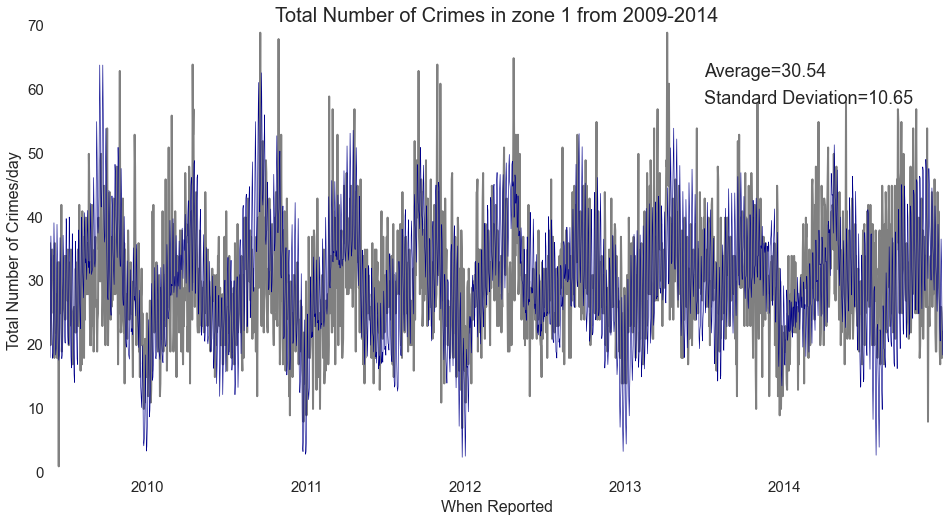

In [142]:
figure = plt.figure(figsize=(16,8))
z1plot =z1TS2.plot(linewidth=2, c='gray')
z1plot.set_ylabel('Total Number of Crimes/day', fontsize=16)
z1plot.set_xlabel('Day',fontsize=16)
z1plot.set_title('Total Number of Crimes in zone 1 from 2009-2014',fontsize=20)
z1plot.tick_params(axis='both', labelsize=15)
z1plot.text(0.8, 0.9,'Average=%.2f' %z1mean, ha='center', va='center', transform=z1plot.transAxes, fontsize = 18)
z1plot.text(0.849, 0.84,'Standard Deviation=%.2f' %z1std, ha='center', va='center', transform=z1plot.transAxes, fontsize = 18);

wave2.plot(linewidth=.6,c='darkblue');

In [143]:
waveDF.to_csv('C:/Users/flunk_000/Desktop/CalPoly/StakeOut/zone1.csv')